In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cha_df = pd.read_excel("Harry Potter Dataset.xlsx", sheet_name = 'Characters')
cha_df.head()

,Id,Name,Gender,Job,House,Wand,Patronus,Species,Blood status,Hair colour,Eye colour,Loyalty,Skills,Birth,Death
0,1.0,Harry James Potter,Male,Student,Gryffindor,"11"" Holly phoenix feather",Stag,Human,Half-blood,Black,Bright green,Albus Dumbledore | Dumbledore's Army | Order o...,Parseltongue| Defence Against the Dark Arts | ...,1980-07-31 00:00:00,NaN
1,2.0,Ronald Bilius Weasley,Male,Student,Gryffindor,"12"" Ash unicorn tail hair",Jack Russell terrier,Human,Pure-blood,Red,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Wizard chess | Quidditch goalkeeping,1980-03-01 00:00:00,NaN
2,3.0,Hermione Jean Granger,Female,Student,Gryffindor,"10¾"" vine wood dragon heartstring",Otter,Human,Muggle-born,Brown,Brown,Dumbledore's Army | Order of the Phoenix | Hog...,Almost everything,1979-09-19 00:00:00,NaN
3,4.0,Albus Percival Wulfric Brian Dumbledore,Male,Headmaster,Gryffindor,"15"" Elder Thestral tail hair core",Phoenix,Human,Half-blood,Silver| formerly auburn,Blue,Dumbledore's Army | Order of the Phoenix | Hog...,Considered by many to be one of the most power...,Late August 1881,1997-06-30 00:00:00
4,5.0,Rubeus Hagrid,Male,Keeper of Keys and Grounds | Professor of Care...,Gryffindor,"16"" Oak unknown core",None,Half-Human/Half-Giant,Part-Human (Half-giant),Black,Black,Albus Dumbledore | Order of the Phoenix | Hogw...,Resistant to stunning spells| above average st...,1928-12-06 00:00:00,NaN


# exploratory analysis

# House

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

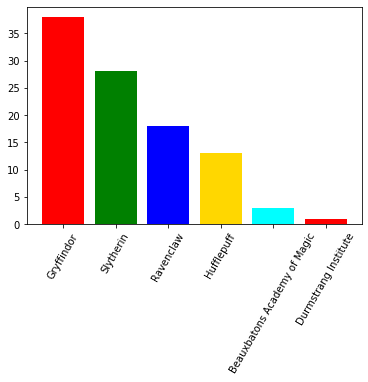

In [9]:
house = cha_df['House'].value_counts()
plt.bar(house.index,house.values, color=['red', 'green', 'blue', 'gold', 'cyan'])
plt.xticks(rotation = 60)


### From a book reader's perspective, it could be a less satisfying for fans of the other 3 houses because of the heavily focus on the house of Gryffindor

### From a business perspective, based on the distribution of Houses, I suggest that offering product lines that are equally focued on the four houses because fans of the other 3 houses might be more than willing to purchase merchandise to make up for the lack of attention in the books. However, more stocks should prepared for the merchandise of the house of Gryffindor to avoid shortage.

# Loyalty

In [10]:
cha_df['Loyalty'].value_counts()

Order of the Phoenix                                                                                        16
Dumbledore's Army |Hogwarts School of Witchcraft and Wizardry                                               14
Lord Voldemort  | Death Eaters                                                                              12
Dumbledore's Army | Order of the Phoenix | Hogwarts School of Witchcraft and Wizardry                        8
Original Order of the Phoenix                                                                                8
Hogwarts School of Witchcraft and Wizardry                                                                   8
Dumbledore's Army                                                                                            6
Minister of Magic                                                                                            4
Dumbledore's Army | Hogwarts School of Witchcraft and Wizardry                                               2
A

In [11]:
cha_df.Loyalty = cha_df['Loyalty'].replace(np.nan, 'no loyalty assigned')
cha_df.Loyalty = cha_df['Loyalty'].str.lower()
cha_df.Loyalty = cha_df.Loyalty.apply(lambda x: 'Dumbledore' if 'dumbledore' in x else x)
cha_df.Loyalty = cha_df.Loyalty.apply(lambda x: 'Dumbledore' if 'order of the phoenix' in x else x)
cha_df.Loyalty = cha_df.Loyalty.apply(lambda x: 'Voldemort' if 'voldemort' in x else x)
loyalty = cha_df['Loyalty'].value_counts().drop(labels=['no loyalty assigned'])
loyalty

Dumbledore                                    61
Voldemort                                     14
hogwarts school of witchcraft and wizardry     8
minister of magic                              4
ministry of magic                              1
gellert grindelwald's acolytes                 1
Name: Loyalty, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

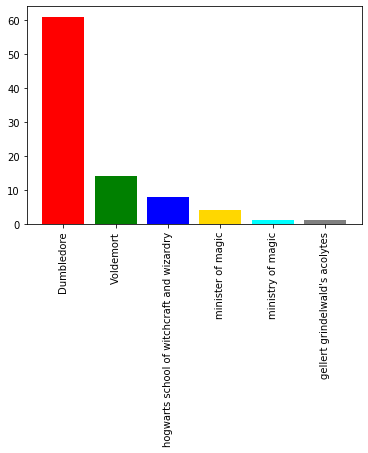

In [12]:
plt.bar(loyalty.index,loyalty.values, color=['red', 'green', 'blue', 'gold', 'cyan','gray'])
plt.xticks(rotation = 90)

### Without even reading the books, from the graph above we could see that the books divided the characters in 2 main factions. Dumbledore's obviously the most beloved character and leader of the Order of the Phoenix and Voldemont is the leader of the Death Eaters.

# Blood Status

In [13]:
cha_df['Blood status'] = cha_df['Blood status'].str.lower()
cha_df['Blood status'] = cha_df['Blood status'].str.strip()
cha_df['Blood status'] = cha_df['Blood status'].str.strip('[')

cha_df['Blood status'] = cha_df['Blood status'].replace(np.nan, 'no record')
cha_df['Blood status']= cha_df['Blood status'].apply(lambda x: 'pure-blood or half-blood' if ('or' in x and 'muggle' not in x) else x)

cha_df['Blood status'].value_counts()

pure-blood or half-blood     66
pure-blood                   34
half-blood                   24
muggle-born                   7
muggle                        4
part-human (half-giant)       2
quarter-veela                 2
part-goblin                   1
squib                         1
muggle-born or half-blood     1
unknown                       1
Name: Blood status, dtype: int64

In [14]:
cha_df.groupby(['House','Blood status'])['Blood status'].count()

House                         Blood status             
Beauxbatons Academy of Magic  part-human (half-giant)       1
                              quarter-veela                 2
Durmstrang Institute          pure-blood or half-blood      1
Gryffindor                    half-blood                    7
                              muggle-born                   5
                              part-human (half-giant)       1
                              pure-blood                   14
                              pure-blood or half-blood     10
                              unknown                       1
Hufflepuff                    half-blood                    4
                              muggle-born                   1
                              pure-blood                    2
                              pure-blood or half-blood      6
Ravenclaw                     half-blood                    6
                              muggle-born                   1
              

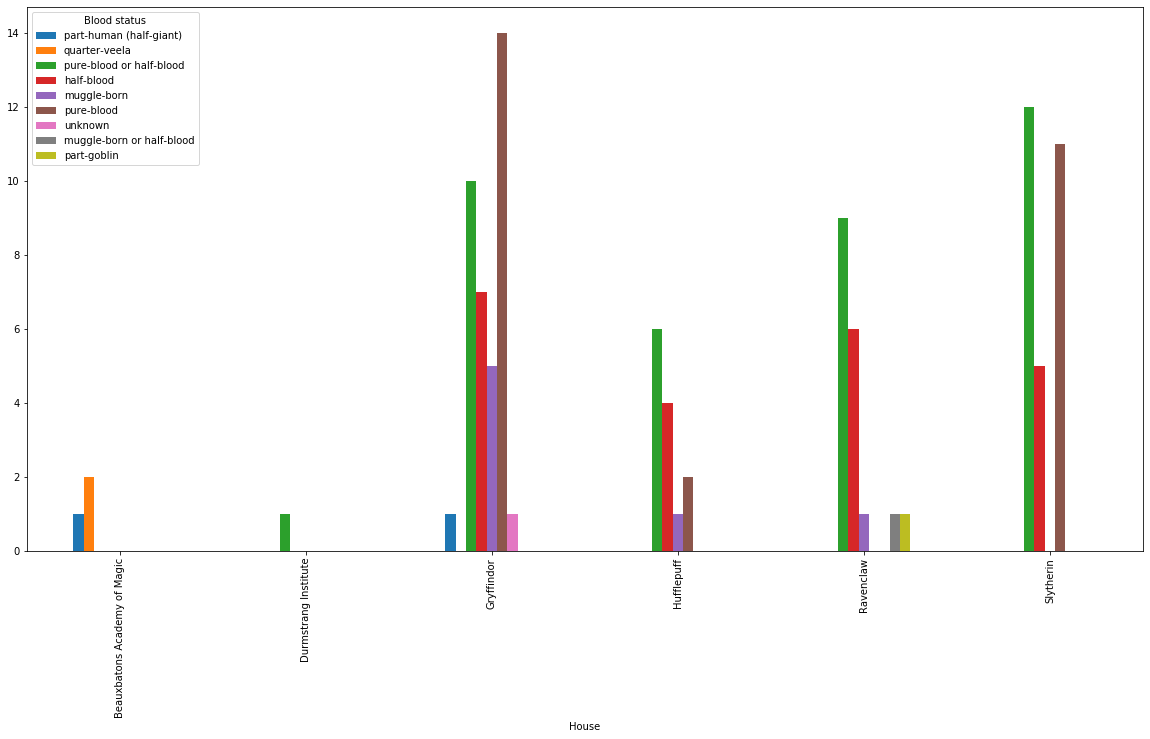

In [15]:
#df_gb = df.groupby(['year', 'month', 'class']).size().unstack(level=2)
df_gb = cha_df.groupby(['House','Blood status'])['Blood status'].count().unstack(level=1)
df_gb.plot(kind = 'bar',figsize=(20,10))

### As I was looking into the bloodstatus based on the houses, I found some pretty interesting insights. You can see from the graph that Slytherin is very selective when it comes to bloodstatus, it only has half-blood or pure-blood student. Where as the Ravenclaw and the Hufflepuff have pure-blood, half-blood and muggle born students. Gryffindor is the most diverse house which has pure-blood, half-blood, muggle-born, and even giant as its student

### As the insight from the Bloodstatus based on the House was pretty interesting, I decided to look relatioinship between Loyalty and Houses

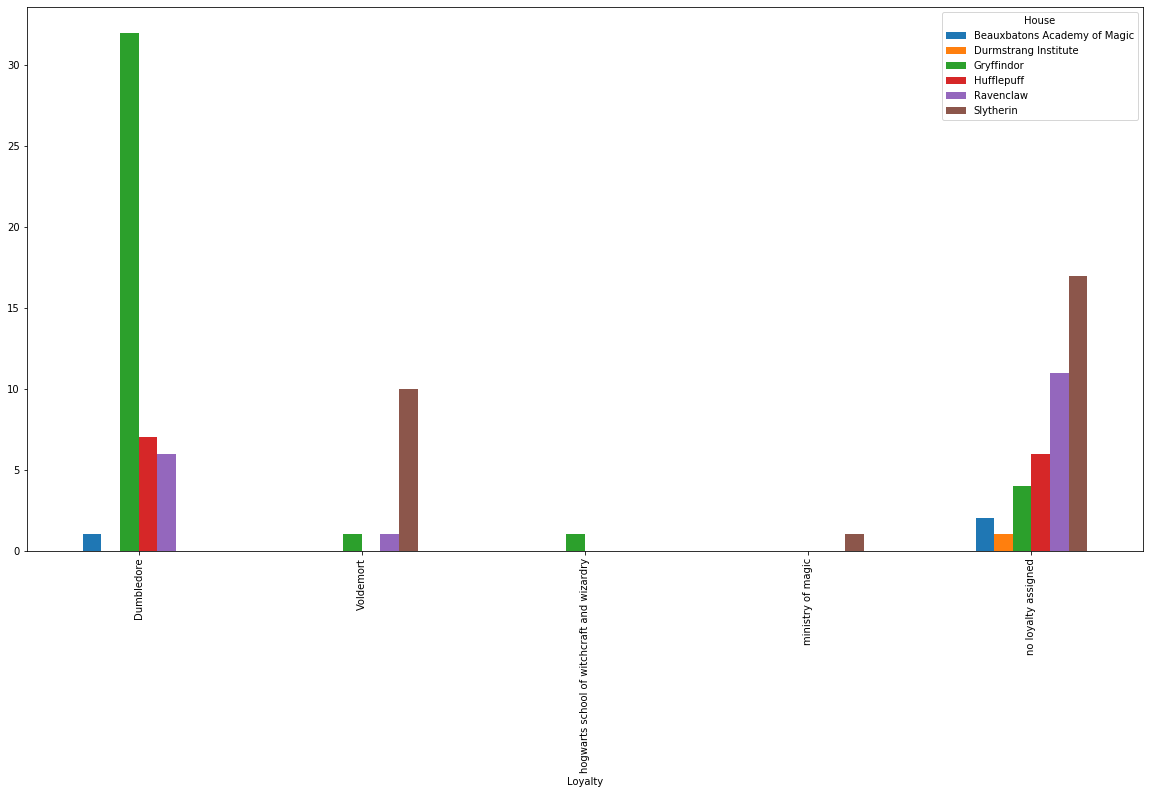

In [16]:
df_gbl = cha_df.groupby(['Loyalty','House'])['House'].count().unstack(level=1)
df_gbl.plot(kind = 'bar',figsize=(20,10))

### We can see that the majority of Dumbledore followers come from Gryffindore and spread across Gryffindore, Ravenclaw and Hufflepuff, where as the majority of Voldermont followers come from the Slytherin and spread across Slytherin, Gryffindore and Ravenclaw

### To dig one step further, where the graph below shows the loyalty within each House

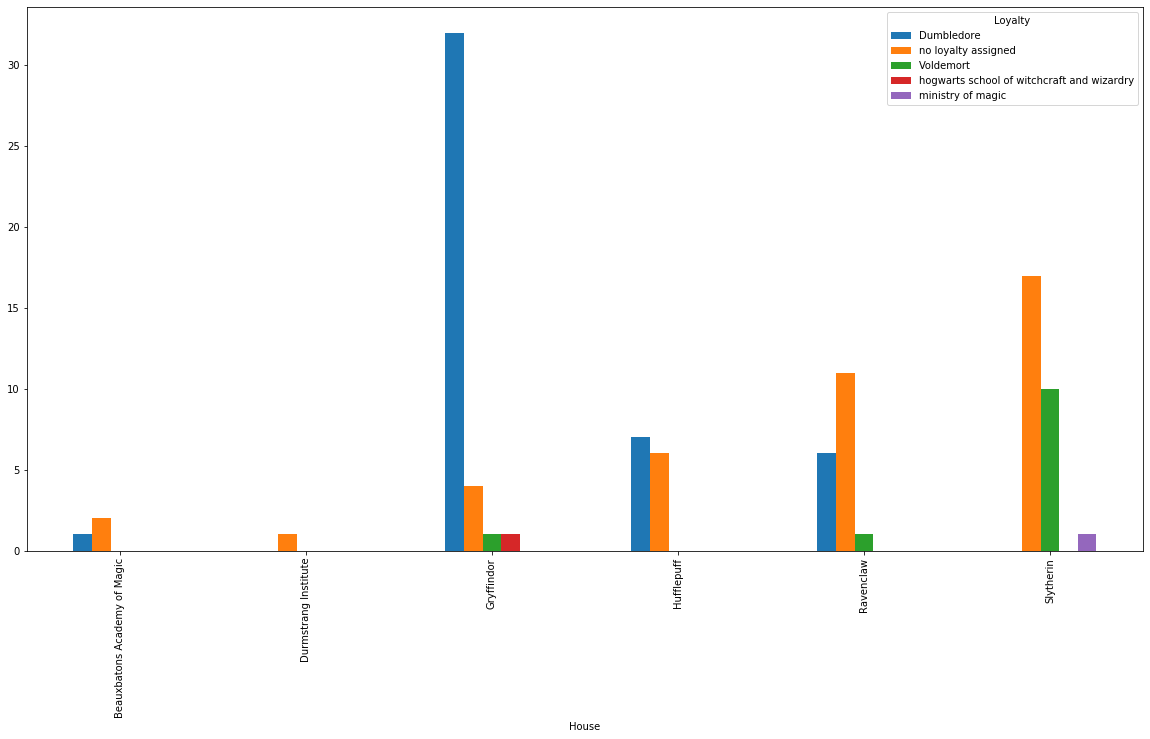

In [17]:
df_gbh = cha_df.groupby(['House','Loyalty'])['House'].count().unstack(level=1)
df_gbh.plot(kind = 'bar',figsize=(20,10))

### We see from the graph that the vast majority in Gryffindore supports Dumbledore and the Slytherin provides a lot of support to Voldermort if we disregard people who's stance we are not sure of.

# Potions

### As a person who would love to make some magical potions, I would very much love the know the diffculties associated with each potion

In [18]:
po_df = pd.read_excel("Harry Potter Dataset.xlsx", sheet_name = 'Potions')
po_df['Difficulty level'] = po_df['Difficulty level'].replace(np.nan, 'No record')
podiff = po_df['Difficulty level'].value_counts()
podiff

No record               49
Advanced                14
Beginner                 6
O.W.L. level             1
Simple to moderate       1
Moderate to advanced     1
Above second year        1
Moderate                 1
Name: Difficulty level, dtype: int64

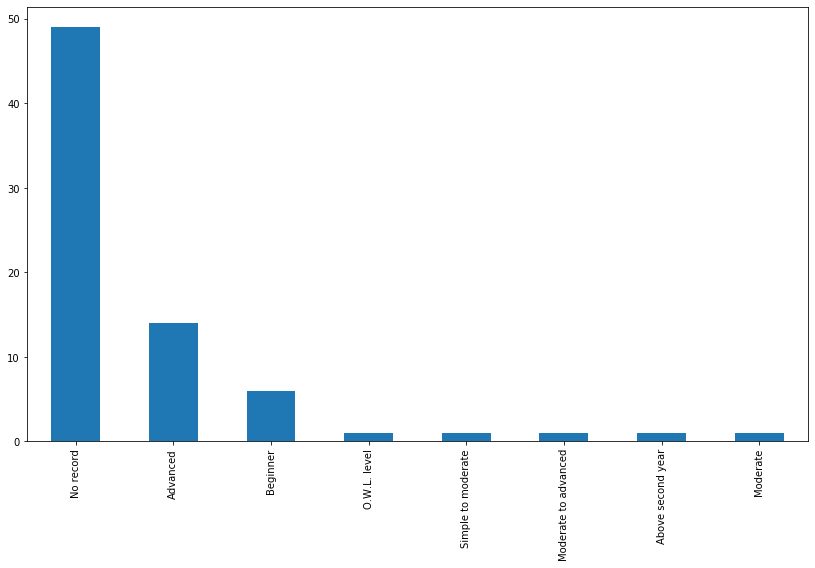

In [19]:
podiff.plot(kind = 'bar',figsize=(14,8))

### Unfortunately, based on the difficuties shown from the graph above, I would say that it is not very beginner friendly, where as only 6 out of the 74 portions are classfied as beginner level.

# Spells

In [20]:
sp_df = pd.read_excel("Harry Potter Dataset.xlsx", sheet_name = 'Spells')
sp_df.head()

,Name,Incantation,Type,Effect,Light
0,Summoning Charm,Accio,Charm,Summons an object,None
1,Age Line,Unknown,Charm,Prevents people above or below a certain age f...,Blue
2,Water-Making Spell,Aguamenti,"Charm, Conjuration",Conjures water,Icy blue
3,Launch an object up into the air,Alarte Ascendare,Charm,Rockets target upward,Red
4,Albus Dumbledore's Forceful Spell,Unknown,Spell,Great Force,None


## in order to know spells better, let's firt get to know the spell types.

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

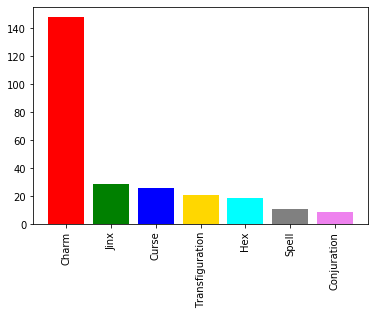

In [21]:
sp_df['Type'] = sp_df['Type'].replace(np.nan, 'NoRecord')
sp_df['Light'] = sp_df['Light'].str.lower()
st = sp_df['Type'].value_counts().head(7)

plt.bar(st.index,st.values, color=['red', 'green', 'blue', 'gold', 'cyan','gray','violet'])
plt.xticks(rotation = 90)

### We can see that there are 7 main types of spells, and charm is most common spell type.

### Now I would like to know, as a muggle, if there is a way for us to idenfy the types of spells. So I decided to look at the relationship between the Light and the spell type.

In [22]:
st.index.tolist()

['Charm', 'Jinx', 'Curse', 'Transfiguration', 'Hex', 'Spell', 'Conjuration']

In [23]:
mask = ((sp_df['Type'] == 'Charm') | 
        (sp_df['Type'] == 'Jinx') | 
        (sp_df['Type'] == 'Curse') | 
        (sp_df['Type'] == 'Transfiguration') |
        (sp_df['Type'] == 'Hex') |
        (sp_df['Type'] == 'Spell') | 
        (sp_df['Type'] == 'Conjuration'))

In [24]:
def lastword(string):
    
   # split by space and converting 
    # string to list and
    lis = list(string.split(" "))
      
    # length of list
    length = len(lis)
      
    # returning last element in list
    return lis[length-1]

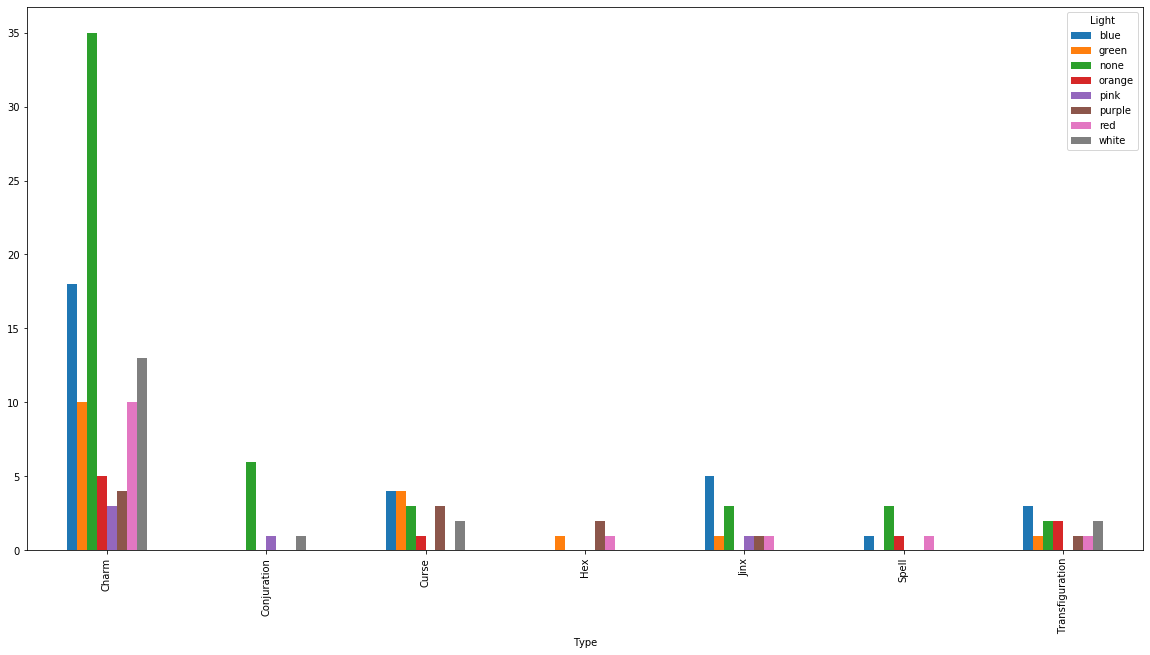

In [25]:
sp_df = sp_df.replace(np.nan, 'NoRecord')
sp_df['Light'] = sp_df['Light'].apply(lastword)

mask2 = ((sp_df['Light'] == 'none') |
        (sp_df['Light'] == 'blue') |
        (sp_df['Light'] == 'white') |
        (sp_df['Light'] == 'green') |
        (sp_df['Light'] == 'purple') |
        (sp_df['Light'] == 'red') |
        (sp_df['Light'] == 'orange') |
        (sp_df['Light'] == 'pink')) 

spl = sp_df[mask & mask2].groupby(['Type','Light'])['Light'].count().unstack(level = 1)#.sum()
spl.plot(kind = 'bar',figsize=(20,10))

### It turns out it is very difficult for us muggles to distinguish one type of spell of another because the majority of spell have none light. Even If we do not put the none light into concideration, it is still very difficult because there is not any strong pattern that associate types of spells and lights because it looks like blue tend to be dominant color for all types of spell.

# Wiki Network Analysis

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import networkx as nx

In [27]:
df = pd.read_excel("Wikipedia Links.xlsx", names = ['ls','lt'])

In [28]:
df['ls']=df['ls'].apply(str).str.lower()
df['lt']=df['lt'].apply(str).str.lower()
df['nodes'] = df[['ls', 'lt']].apply(tuple, axis=1) 
ls = df['ls'].unique().tolist()
df.head()

,ls,lt,nodes
0,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,bede,"(%c3%81ed%c3%a1n_mac_gabr%c3%a1in, bede)"
1,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,columba,"(%c3%81ed%c3%a1n_mac_gabr%c3%a1in, columba)"
2,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,d%c3%a1l_riata,"(%c3%81ed%c3%a1n_mac_gabr%c3%a1in, d%c3%a1l_ri..."
3,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,great_britain,"(%c3%81ed%c3%a1n_mac_gabr%c3%a1in, great_britain)"
4,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,ireland,"(%c3%81ed%c3%a1n_mac_gabr%c3%a1in, ireland)"


### let's first try to see if wen can gain any insights from the whole network consutred using the data.


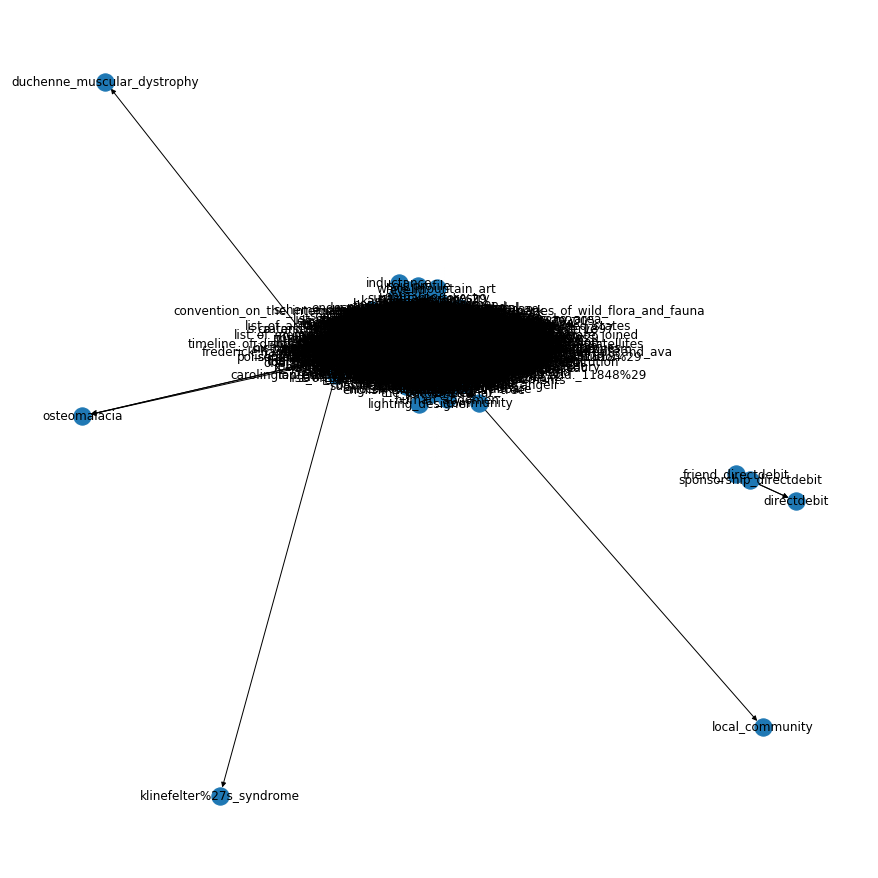

In [30]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'ls', 'lt', create_using=nx.DiGraph())
plt.figure(figsize=(12,12))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

### unfortunately, the data is too sparse to look as a whole network because it's all clogged up as a single big network. However, there is some interesting to look at here, we can notice that there is a isolated island shown on the right of the graph. As I was looking into it, it apperars that the there was not any articles about sponsorship directdebit on wikipedia, however, there was article about direct debit, so I guess the problem was caused by the data

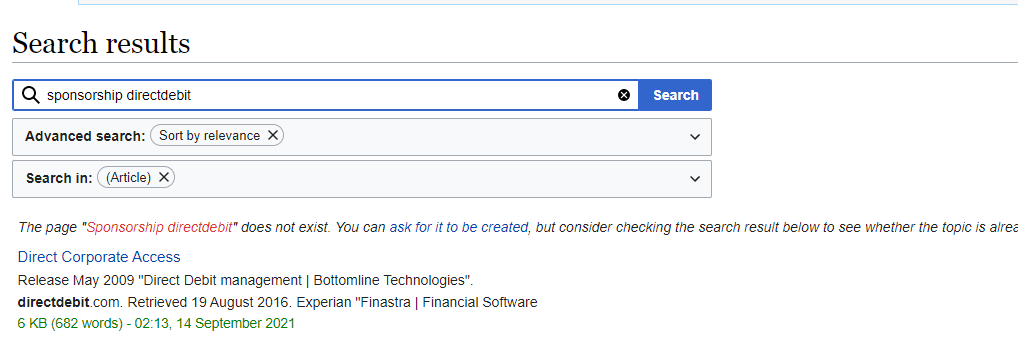

### Now let's look at the network at a more granular level. I decided to calculated the degree, betweenness, closeness of each unique linksource first, then I would love to see if there are any insights to be gained from looking at the top socrers within each category 

In [31]:
degree = nx.degree_centrality(G) # calculate dgree
betweenness = nx.betweenness_centrality(G) # calculate betweenness
closeness = nx.closeness_centrality(G) # Calculate closeness

centrality = pd.DataFrame([degree, betweenness, closeness]).T
centrality.reset_index(inplace = True)
centrality.columns = ['Username', 'Degree', 'Betweenness', 'Closeness']
centrality.head()

,Username,Degree,Betweenness,Closeness
0,%c3%81ed%c3%a1n_mac_gabr%c3%a1in,0.002396,0.000000,0.000000
1,bede,0.008495,0.000136,0.355165
2,columba,0.005010,0.000041,0.331740
3,d%c3%a1l_riata,0.006970,0.000054,0.312937
4,great_britain,0.046831,0.002782,0.453663


In [32]:
centrality.sort_values(by = 'Degree',ascending = False)[:10]

,Username,Degree,Betweenness,Closeness
102,united_states,0.401873,0.094090,0.590353
30,united_kingdom,0.248312,0.042384,0.541466
183,europe,0.237857,0.026992,0.542750
38,france,0.227401,0.012002,0.539805
61,england,0.201046,0.032403,0.511627
40,germany,0.198650,0.019409,0.524285
31,world_war_ii,0.189501,0.015500,0.523446
54,english_language,0.155957,0.014041,0.513233
115,india,0.150730,0.011256,0.513233
370,london,0.150076,0.014675,0.488423


In [44]:
nl_degree = centrality.sort_values(by = 'Degree',ascending = False)[:10]['Username'].tolist()
df2 = df[df['ls'].isin(nl_degree)]

G2 = nx.Graph()
G2.add_nodes_from(nl_degree)
G2.add_edges_from(df2['nodes'])

de = dict(G2.degree)

d = dict(nx.degree(G2))

de2 = [de[v] for v in de.keys()]

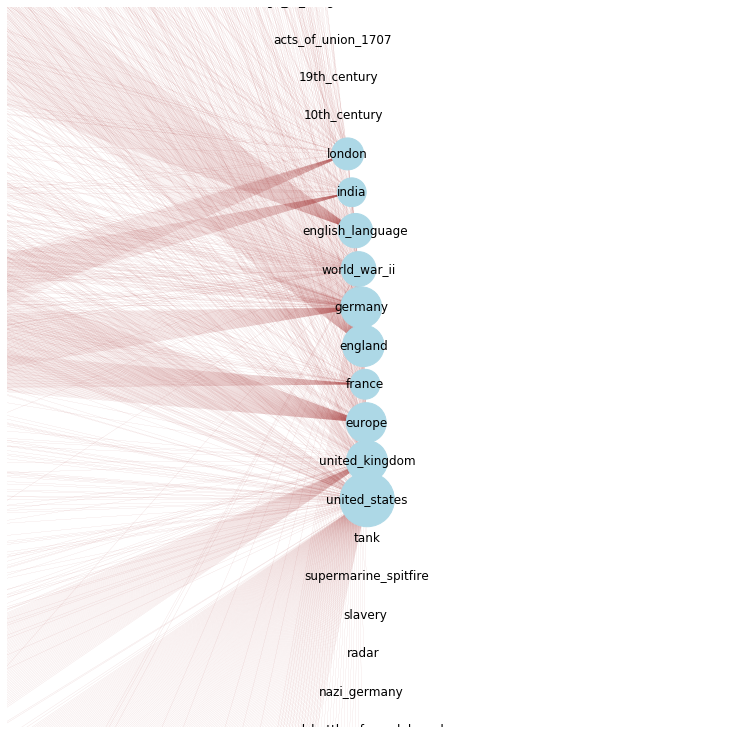

In [45]:
plt.figure(figsize=(10,10))

nx.draw_circular(G2,node_size=[v*10 for v in d.values()],nodelist = nl_degree, with_labels = True, node_color='lightblue', linewidths=None, width=0.05, edge_color ='#A52A2A')

plt.show()

### As you can see from the graph above, the size of the node represents the degree score, and the red edges represent the connection linked to that particular node. We can clearly see the the bigger the node, the more the edges. The top 10 scorers in the Degree categories are mostly countries, cities, languages, and WWII. Which makes perfert sense because degree measures how many connections each node has, and the more connection a node has, the more information it holds. 

### Now let's take a look to see if sorting by betweeness tells a different story.

In [42]:
centrality.sort_values(by = 'Betweenness',ascending = False)[:10]

,Username,Degree,Betweenness,Closeness
102,united_states,0.401873,0.094090,0.590353
30,united_kingdom,0.248312,0.042384,0.541466
61,england,0.201046,0.032403,0.511627
183,europe,0.237857,0.026992,0.542750
424,africa,0.150076,0.024204,0.486502
40,germany,0.198650,0.019409,0.524285
31,world_war_ii,0.189501,0.015500,0.523446
131,19th_century,0.098671,0.014824,0.467090
370,london,0.150076,0.014675,0.488423
54,english_language,0.155957,0.014041,0.513233


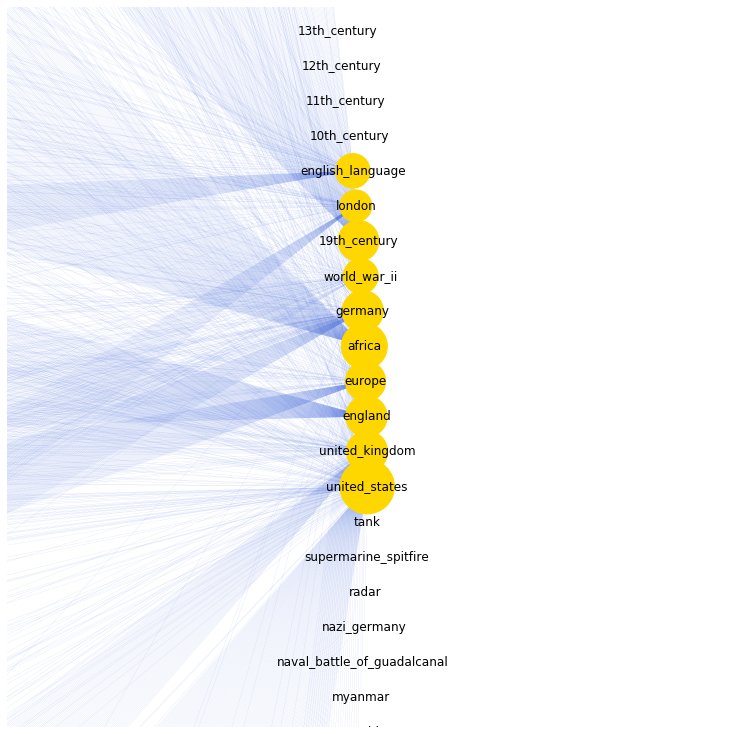

In [47]:
nl_bet = centrality.sort_values(by = 'Betweenness',ascending = False)[:10]['Username'].tolist()
df3 = df[df['ls'].isin(nl_bet)]

G3 = nx.Graph()
G3.add_nodes_from(nl_bet)
G3.add_edges_from(df3['nodes'])

de_bet = dict(G3.degree)

d_bet = dict(nx.degree(G3))

de2_bet = [de_bet[v] for v in de_bet.keys()]

plt.figure(figsize=(10,10))

nx.draw_circular(G3,node_size=[v*10 for v in d_bet.values()],nodelist = nl_bet, with_labels = True, node_color='gold', linewidths=None, width=0.05, edge_color ='royalblue')

plt.show()

### As you can see from the graph above, the top 10 scorers still are countries, languages, wars and times period. Betweeness serves as the bridge that provides shortest path from point A to point B, we can sort of see top scorers in bettweeness as central table which connects lots of more granular table. 

### Last but now least, let's sort it by closeness and see what can we find out about it.

In [48]:
centrality.sort_values(by = 'Closeness',ascending = False)[:10]

,Username,Degree,Betweenness,Closeness
102,united_states,0.401873,0.094090,0.590353
183,europe,0.237857,0.026992,0.542750
30,united_kingdom,0.248312,0.042384,0.541466
38,france,0.227401,0.012002,0.539805
40,germany,0.198650,0.019409,0.524285
31,world_war_ii,0.189501,0.015500,0.523446
1012,latin,0.102810,0.004614,0.513463
115,india,0.150730,0.011256,0.513233
54,english_language,0.155957,0.014041,0.513233
61,england,0.201046,0.032403,0.511627


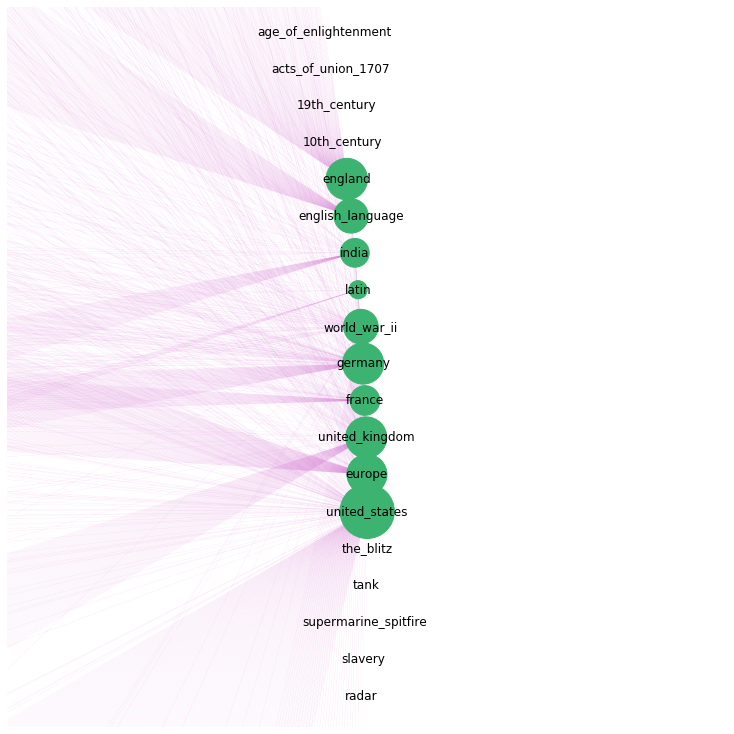

In [57]:
nl_clo = centrality.sort_values(by = 'Closeness',ascending = False)[:10]['Username'].tolist()
df4 = df[df['ls'].isin(nl_clo)]

G4 = nx.Graph()
G4.add_nodes_from(nl_clo)
G4.add_edges_from(df4['nodes'])

de_clo = dict(G4.degree)

d_clo = dict(nx.degree(G4))

de2_clo = [de_clo[v] for v in de_clo.keys()]

plt.figure(figsize=(10,10))

nx.draw_circular(G4,node_size=[v*10 for v in d_clo.values()],nodelist = nl_clo, with_labels = True, node_color='mediumseagreen', linewidths=None, width=0.05, edge_color ='orchid')

plt.show()

### As you can see from the graph above, the story still is pretty much the same, countries, languages and WWII scores the highest in Closeness again. Closeness serves as broadcasters within a network. For example, incidents that are realted to the top Closeness scorers are more likly to be known by people. Which also makes perfect sense in the real world, becase we all know the big things going on in our country even if we did not pay much attention to it. 

### To conclude the wikipedia network analysis, Although we did not gain much insights looking at the entire dataset as a whole, we did find some interesting things at more granular level. And as a user, if I were to accquire as much information as possible randomly, I would better start with a country, a city, or a language on Wikipedia. 